<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Arnav, Narendra

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [23]:
# User input for asset/company
asset_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix): ").upper()
print(f"\nData analysis will be performed for: {asset_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix): Netflix

Data analysis will be performed for: NETFLIX


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [24]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [25]:
try:
    # Attempt to fetch summary by appending ' company' to the asset name
    try:
        wiki_summary = wikipedia.summary(f"{asset_name} company", sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
    except wikipedia.exceptions.PageError:
        # If appending ' company' doesn't work, try the original asset name
        wiki_summary = wikipedia.summary({asset_name}, sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
except Exception as e:
    print(f"Could not fetch Wikipedia summary: {e}")


 Wikipedia Summary:

Netflix, Inc. is an American media company founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, and currently based in Los Gatos, California, with production offices and stages at the Los Angeles-based Hollywood studios (formerly old Warner Brothers studios) and the Albuquerque Studios (formerly ABQ studios). It owns and operates an eponymous over-the-top subscription video on-demand service, which showcases acquired and original programming as well as third-party content licensed from other production companies and distributors. Netflix is also the first streaming media company to be a member of the Motion Picture Association.
Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business.


## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [26]:
try:
    ticker = yf.Ticker(asset_name if asset_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for NETFLIX:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-10-09 00:00:00+00:00,123337.070312,123739.343750,119812.031250,121705.585938,74653009425,0.0,0.0
1,2025-10-10 00:00:00+00:00,121704.742188,122509.664062,104582.414062,113214.367188,153125018868,0.0,0.0
2,2025-10-11 00:00:00+00:00,113236.429688,113429.726562,109760.562500,110807.882812,110236934340,0.0,0.0
3,2025-10-12 00:00:00+00:00,110811.515625,115805.062500,109715.539062,115169.765625,93710414091,0.0,0.0
4,2025-10-13 00:00:00+00:00,115161.679688,116020.484375,113821.187500,115271.078125,71582026739,0.0,0.0


## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [27]:
# Construct RSS feed URL for Google News
rss_url = f"https://news.google.com/rss/search?q={asset_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for NETFLIX:


,Title,Link,Published
0,Netflix cofounder says he stopped work at 5 p....,https://news.google.com/rss/articles/CBMi3AFBV...,"Fri, 07 Nov 2025 16:44:00 GMT"
1,7 new movies and TV shows to stream on Netflix...,https://news.google.com/rss/articles/CBMi0AFBV...,"Fri, 07 Nov 2025 15:00:00 GMT"
2,Halstead 'horror chocolatier' creates gory pro...,https://news.google.com/rss/articles/CBMiggFBV...,"Sun, 09 Nov 2025 06:20:05 GMT"
3,"Zoey Deutch on Nouvelle Vague, Netflix Blooper...",https://news.google.com/rss/articles/CBMipAFBV...,"Sat, 08 Nov 2025 18:00:00 GMT"
4,Zach Cregger Sci-Fi Movie 'The Flood' Stalled ...,https://news.google.com/rss/articles/CBMihgFBV...,"Thu, 06 Nov 2025 23:47:53 GMT"
5,"Stream It Or Skip It: ‘Baramulla’ on Netflix, ...",https://news.google.com/rss/articles/CBMiiwFBV...,"Sat, 08 Nov 2025 13:15:00 GMT"
6,Behind ‘KPop Demon Hunters’ Sequel Deal: Netfl...,https://news.google.com/rss/articles/CBMipAFBV...,"Fri, 07 Nov 2025 00:19:11 GMT"
7,How to get tickets for Netflix House Dallas op...,https://news.google.com/rss/articles/CBMihAFBV...,"Fri, 07 Nov 2025 17:24:00 GMT"
8,Netflix’s ‘A House of Dynamite’ sparks discuss...,https://news.google.com/rss/articles/CBMipAFBV...,"Thu, 06 Nov 2025 23:20:47 GMT"
9,Netflix’s Podcasting Play - status.news,https://news.google.com/rss/articles/CBMia0FVX...,"Fri, 07 Nov 2025 22:17:48 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [28]:
fake = Faker()
positive_phrases = [
    f"{asset_name} is surging! 🚀",
    f"Profits from {asset_name} are amazing!",
    f"Holding {asset_name} long-term, confident.",
    f"{asset_name} adoption is growing worldwide!",
    f"Investors are optimistic about {asset_name}."
]

negative_phrases = [
    f"Worried about {asset_name} volatility.",
    f"{asset_name} might crash soon.",
    f"{asset_name}'s future is uncertain.",
    f"High risks in {asset_name} investments.",
    f"{asset_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{asset_name} price remains stable today.",
    f"Market watching {asset_name} closely.",
    f"{asset_name} updates coming soon.",
    f"{asset_name} performance unchanged.",
    f"Analysts report on {asset_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,NETFLIX performance unchanged.
1,NETFLIX price remains stable today.
2,"Holding NETFLIX long-term, confident."
3,Market watching NETFLIX closely.
4,Profits from NETFLIX are amazing!


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [29]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,NETFLIX performance unchanged.,0.00,Neutral
1,NETFLIX price remains stable today.,0.00,Neutral
2,"Holding NETFLIX long-term, confident.",0.50,Positive
3,Market watching NETFLIX closely.,0.00,Neutral
4,Profits from NETFLIX are amazing!,0.75,Positive


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

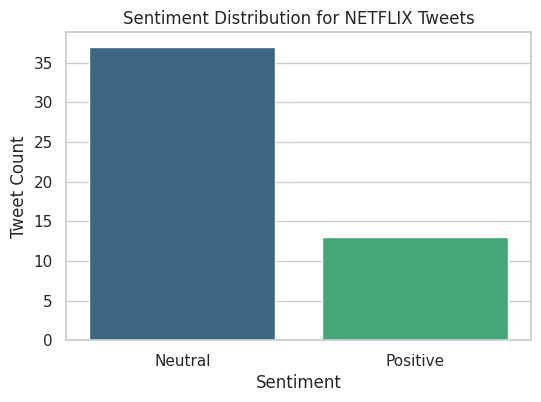

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {asset_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


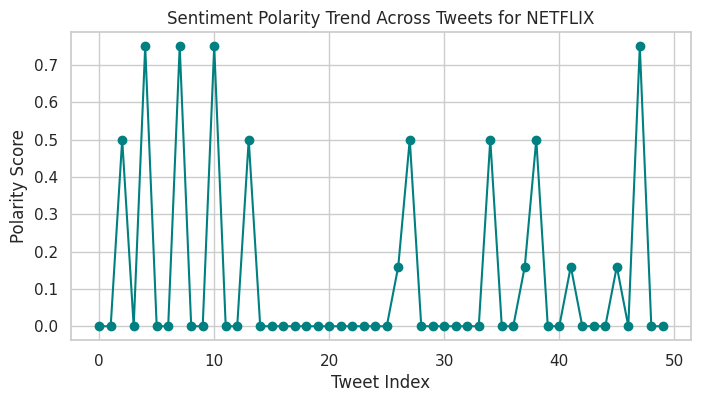

In [31]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {asset_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


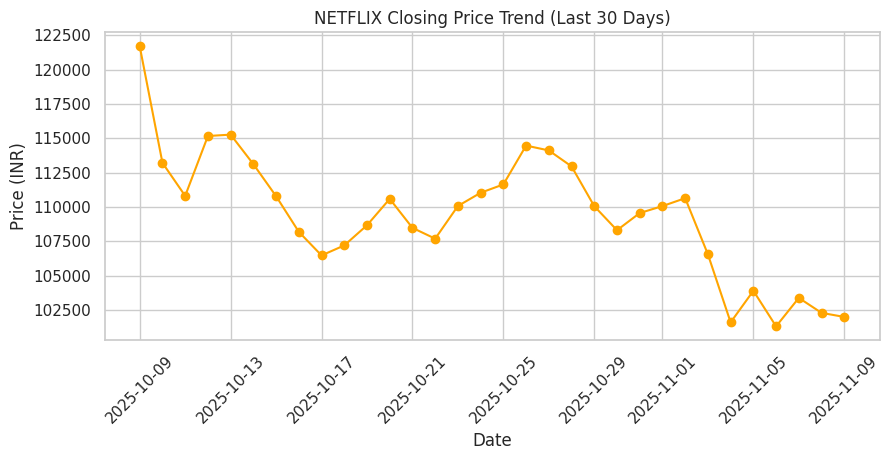

In [32]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{asset_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()